In [1]:
import pandas as pd
from pathlib import Path

excel_files = [
    "/content/2017_data_with_UTR_F.xlsx",
    "/content/2018_data_with_UTR_F.xlsx",
    "/content/2019_data_with_UTR_F.xlsx",
    "/content/2020_data_with_UTR_F.xlsx",
    "/content/2021_data_with_UTR-FINAL.xlsx",
    "/content/2022_data_with_UTR_F.xlsx",
    "/content/2023_data_with_UTR_F.xlsx",
    "/content/2024_data_with_UTR_FINAL.xlsx",
]

dfs = []
for fp in excel_files:
    df = pd.read_excel(fp)
    file_stem = Path(fp).stem
    year = file_stem.split("_")[0]
    df["year"] = year
    df["source_file"] = Path(fp).name
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True, sort=False)

# Add unique row_id and global_ID
df_all["row_id"] = df_all.index + 1
df_all["global_ID"] = df_all["year"].astype(str) + "_" + df_all["row_id"].astype(str)

output_path = "/content/all_years_combined_with_global_ID.xlsx"
df_all.to_excel(output_path, index=False)

print(f"Combined {len(excel_files)} files into {len(df_all)} rows.")
print(f"Saved file to: {output_path}")

Combined 8 files into 87315 rows.
Saved file to: /content/all_years_combined_with_global_ID.xlsx


In [28]:
import pandas as pd
file_path = r"/content/all_years_combinedWithUtilization-FINAL.xlsx"
df = pd.read_excel(file_path)

Some of the associations are not needed, so we will remove them and perform a graphical visualization of the relevant columns that we believe can provide the most information.

We decided in Excel to delete the columns that would not be needed for visual presentation in graphs because they do not provide important insights, for example, we know that there were completely empty columns and therefore they were not needed, so their visual presentation will not be possible. We also know that this is the site of Assuta Ramat HaHayal Hospital, namely site number 20, and therefore there is no need to mention it again. Additional columns were deleted because they were a step towards the final calculation in connection with the calculation of the percentage of daily utilization per room per day.

List of deleted columns:
"Site Code",
    "Pre-Surgery Patient File (External)",
    "Cancellation Reason on Surgery Day",
    "Readmission",
    "strict_signature",
    "Entry DateTime",
    "Incision DateTime",
    "Closure DateTime",
    "Exit DateTime",
    "Planned Start DateTime",
    "Planned End DateTime"
    "S_p_raw",
    "S_p_raw_hours",
    "S_p_limited",
    "S_p_hours_limited",
    "SU_p_before_limited",
    "SU_p_before_hours",
    "SU_p_after_limited",
    "SU_p_after_hours",
    "Block Duration Hours",
    "daily_utilization_rate_x",
    "daily_utilization_rate_y",
    "global_ID".

There are a total of 42 columns, with no information about the hospitalizations of patients in 2023 and 2024 in those years.
The updated file is: all_years_combined_with_global_ID-FINAL.xlsx

### We will get rid of extreme and illogical values:


Weight:

In [29]:
import pandas as pd

col = 'Weight'

# Basic stats
print("Statistics for column:", col)
print(df[col].describe())

# Absolute extremes
min_val = df[col].min()
max_val = df[col].max()
print(f"Minimum {col}: {min_val}")
print(f"Maximum {col}: {max_val}")

# Top/Bottom N values
print("\n5 smallest values:")
print(df.nsmallest(5, col)[['patient_id', col]])

print("\n5 largest values:")
print(df.nlargest(5, col)[['patient_id', col]])

# IQR-based outlier detection
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"\nOutliers (outside {lower_bound:.1f}-{upper_bound:.1f}):")
print(outliers[['patient_id', col]])

Statistics for column: Weight
count    87222.000000
mean        80.800761
std        408.482837
min          0.000000
25%         66.000000
50%         76.000000
75%         89.000000
max      97113.000000
Name: Weight, dtype: float64
Minimum Weight: 0.0
Maximum Weight: 97113.0

5 smallest values:
       patient_id  Weight
3473        11808     0.0
9768        31672     0.0
19900       22772     0.0
21147       27131     0.0
26815        3323     0.0

5 largest values:
       patient_id   Weight
2560         8504  97113.0
41749       11022  70167.0
3007        10141   9980.0
10081       32530   9889.0
5483        17362    918.0

Outliers (outside 31.5-123.5):
       patient_id  Weight
7              40   129.0
116           897   125.0
121           904   173.0
152           964   178.0
408          1552   125.0
...           ...     ...
86846       17864   138.0
86848       17876   130.0
87072       19219   133.0
87107       19489   167.0
87197       20007   178.0

[1893 rows x 2 colu

/tmp/ipython-input-30-1045276529.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.4, palette="pastel")


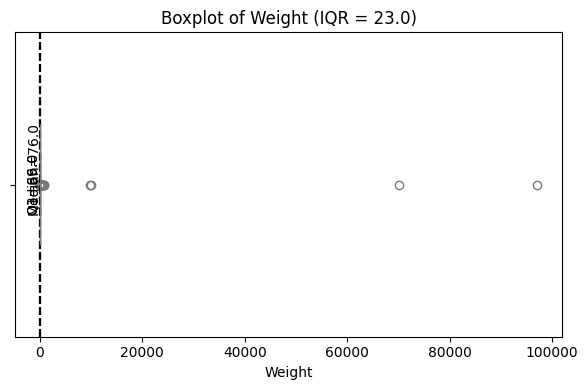

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col = 'Weight'

# Compute quartiles
q1 = df[col].quantile(0.25)
median = df[col].quantile(0.50)
q3 = df[col].quantile(0.75)
iqr = q3 - q1

# Create a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col], width=0.4, palette="pastel")
plt.title(f"Boxplot of {col} (IQR = {iqr:.1f})")
plt.xlabel(col)

# Annotate Q1, median, Q3
for q, label in zip([q1, median, q3], ['Q1', 'Median', 'Q3']):
    plt.axvline(q, color='k', linestyle='--')
    plt.text(q, 0.1, f'{label}={q:.1f}', rotation=90,
             verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()

According to this site: https://www.businessinsider.com/what-is-the-maximum-weight-a-human-can-theoretically-lift-2025-4
 a person's maximum weight can range from about 455 to 500 kilograms, so we decided to put a rough limit above which each number will automatically receive the maximum value, which is 221.

In [31]:
# Compute and apply the cap
max_valid = df.loc[df['Weight'] <= 420, 'Weight'].max()
df['Weight'] = df['Weight'].clip(upper=max_valid)

# Verify
print("Max valid weight:", max_valid)
print("New max in df:", df['Weight'].max())

Max valid weight: 210.0
New max in df: 210.0


The same is done for height.

In [32]:
col = 'Height'

# Basic stats
print("Statistics for column:", col)
print(df[col].describe())

# Absolute extremes
min_val = df[col].min()
max_val = df[col].max()
print(f"Minimum {col}: {min_val}")
print(f"Maximum {col}: {max_val}")

# Top/Bottom N values
print("\n5 smallest values:")
print(df.nsmallest(5, col)[['patient_id', col]])

print("\n5 largest values:")
print(df.nlargest(5, col)[['patient_id', col]])

# IQR-based outlier detection
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"\nOutliers (outside {lower_bound:.1f}-{upper_bound:.1f}):")
print(outliers[['patient_id', col]])

Statistics for column: Height
count    87208.000000
mean         1.682904
std          0.235641
min          0.600000
25%          1.610000
50%          1.680000
75%          1.750000
max         21.760000
Name: Height, dtype: float64
Minimum Height: 0.6
Maximum Height: 21.76

5 smallest values:
       patient_id  Height
8250        27014    0.60
15217        5784    0.61
40443        6378    0.61
46704       27808    0.61
70881       31293    0.61

5 largest values:
       patient_id  Height
47403       29727   21.76
59061       29112   19.77
37749       39538   19.60
70927       31542   18.72
58236       26956   17.38

Outliers (outside 1.4-2.0):
       patient_id  Height
104           880   17.20
121           904    0.84
137           935    0.74
455          1709    1.97
529          1818    1.40
...           ...     ...
86661       17038    0.67
86759       17484    2.00
86843       17857    0.65
86853       17884    1.39
87152       19849    1.40

[297 rows x 2 columns]


/tmp/ipython-input-33-64545944.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], width=0.4, palette="pastel")


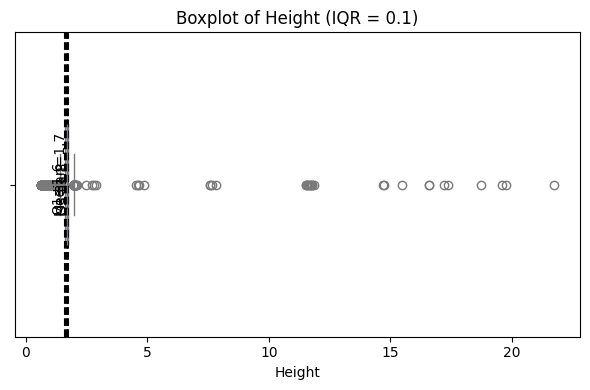

In [33]:
col = 'Height'

# Compute quartiles
q1 = df[col].quantile(0.25)
median = df[col].quantile(0.50)
q3 = df[col].quantile(0.75)
iqr = q3 - q1

# Create a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col], width=0.4, palette="pastel")
plt.title(f"Boxplot of {col} (IQR = {iqr:.1f})")
plt.xlabel(col)

# Annotate Q1, median, Q3
for q, label in zip([q1, median, q3], ['Q1', 'Median', 'Q3']):
    plt.axvline(q, color='k', linestyle='--')
    plt.text(q, 0.1, f'{label}={q:.1f}', rotation=90,
             verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()

In [34]:
# Cap Height at 2.1 meters
df['Height'] = df['Height'].clip(upper=2.1)

# Verify
print("New max Height:", df['Height'].max())

New max Height: 2.1


Giving a maximum threshold to the high values and associating everything beyond the maximum limit to that number will create a peak at this value, but from counting and looking at the data frame, there are 34 rows, so the peak will not be large.

The minimum age is expected to be negative and cannot be the minimum. It approaches zero for a newborn patient.

In [35]:
col = 'Patient Age (on Surgery Day)'

# Basic stats
print("Statistics for column:", col)
print(df[col].describe())

# Absolute extremes
min_val = df[col].min()
max_val = df[col].max()
print(f"Minimum {col}: {min_val}")
print(f"Maximum {col}: {max_val}")

# Top/Bottom N values
print("\n5 smallest values:")
print(df.nsmallest(5, col)[['patient_id', col]])

print("\n5 largest values:")
print(df.nlargest(5, col)[['patient_id', col]])

# IQR-based outlier detection
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"\nOutliers (outside {lower_bound:.1f}-{upper_bound:.1f}):")
print(outliers[['patient_id', col]])

Statistics for column: Patient Age (on Surgery Day)
count    87315.000000
mean        56.285415
std         15.892810
min         -4.000000
25%         45.000000
50%         58.000000
75%         69.000000
max        101.000000
Name: Patient Age (on Surgery Day), dtype: float64
Minimum Patient Age (on Surgery Day): -4
Maximum Patient Age (on Surgery Day): 101

5 smallest values:
       patient_id  Patient Age (on Surgery Day)
10291       33080                            -4
67238       19210                             4
54533       13256                            12
205          1056                            13
11913       36943                            13

5 largest values:
       patient_id  Patient Age (on Surgery Day)
54761       13897                           101
56528       21085                           101
7521        24851                           100
31640       19589                            99
48722       32689                            98

Outliers (outside 9.0-

In [36]:
# Clip negative ages to zero
df['Patient Age (on Surgery Day)'] = df['Patient Age (on Surgery Day)'].clip(lower=0)

# Verify
print("Min Age after clipping:", df['Patient Age (on Surgery Day)'].min())  # should be 0

Min Age after clipping: 0


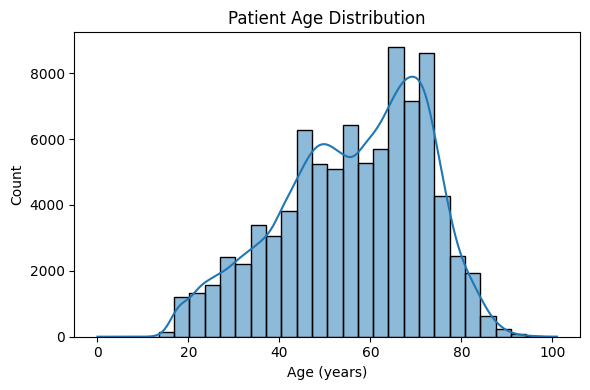

In [37]:
# Patient Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Patient Age (on Surgery Day)"], bins=30, kde=True)
plt.title("Patient Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

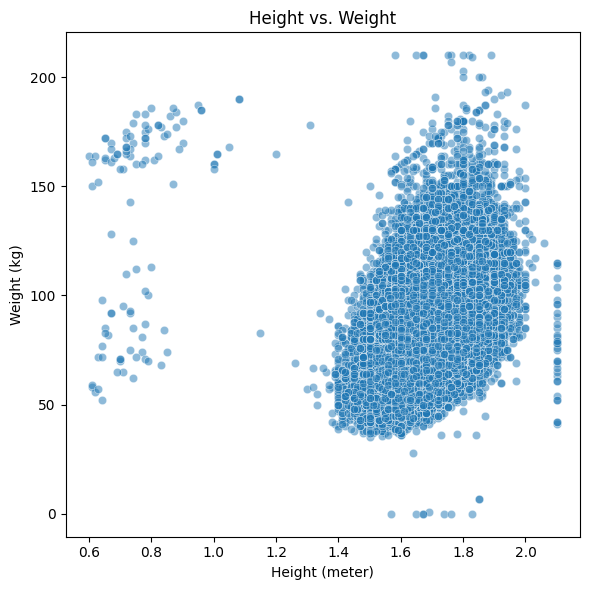

In [38]:
# Height vs. Weight scatter
plt.figure(figsize=(6,6))
sns.scatterplot(x="Height", y="Weight", data=df, alpha=0.5)
plt.title("Height vs. Weight")
plt.xlabel("Height (meter)")
plt.ylabel("Weight (kg)")
plt.tight_layout()
plt.show()

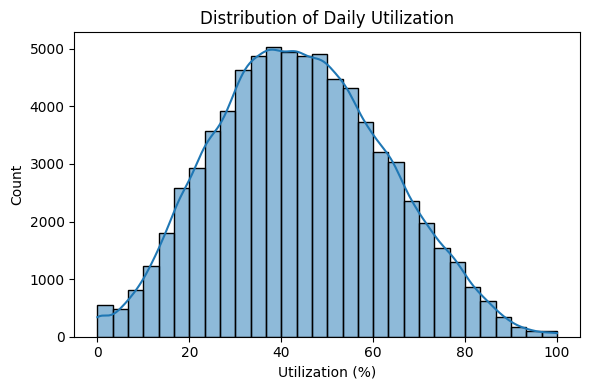

In [40]:
# Histogram of daily_utilization_rate
plt.figure(figsize=(6,4))
sns.histplot(df["daily_utilization_rate"], bins=30, kde=True)
plt.title("Distribution of Daily Utilization")
plt.xlabel("Utilization (%)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

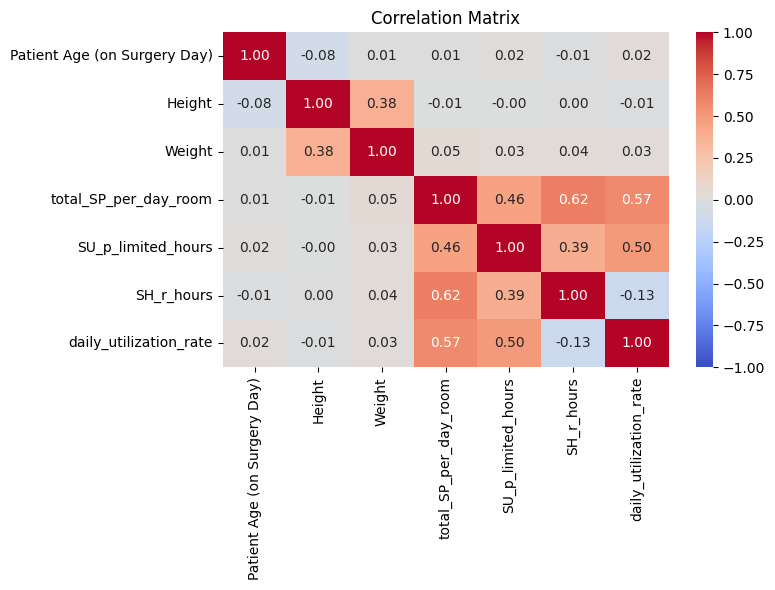

In [41]:
# Correlation heatmap of key numeric features
num_cols = [
    "Patient Age (on Surgery Day)","Height","Weight",
    "total_SP_per_day_room","SU_p_limited_hours","SH_r_hours","daily_utilization_rate"
]
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

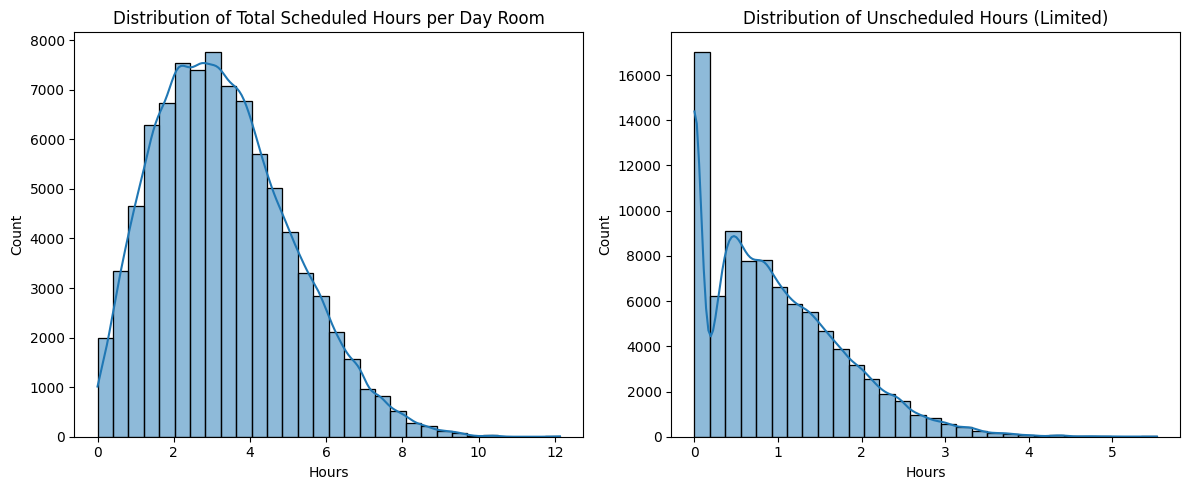

In [46]:
# Create a figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 'total_SP_per_day_room'
sns.histplot(df["total_SP_per_day_room"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Total Scheduled Hours per Day Room")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")

# Plot histogram for 'SU_p_limited_hours'
sns.histplot(df["SU_p_limited_hours"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Unscheduled Hours (Limited)")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")

# Adjust layout and display plots
plt.tight_layout()
plt.show()

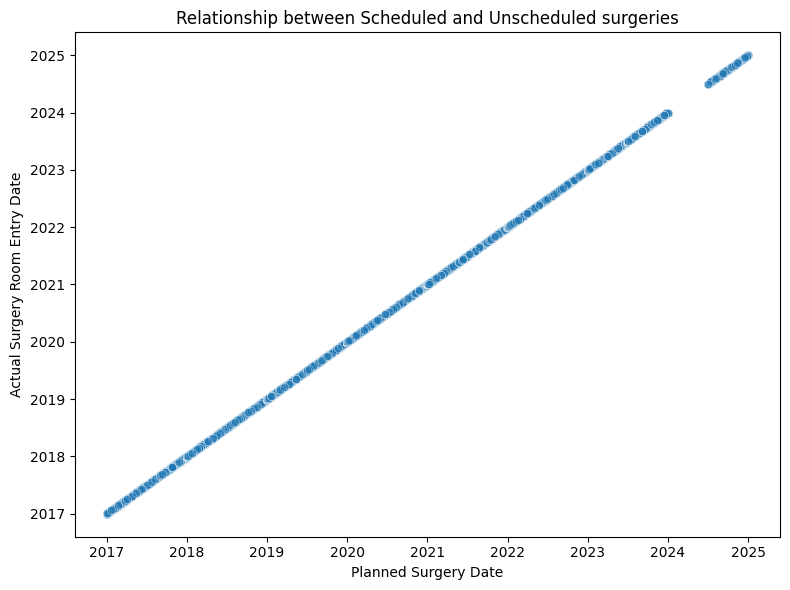

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Planned Surgery Date", y="Actual Surgery Room Entry Date", data=df, alpha=0.5)
plt.title("Relationship between Scheduled and Unscheduled surgeries")
plt.xlabel("Planned Surgery Date")
plt.ylabel("Actual Surgery Room Entry Date")
plt.tight_layout()
plt.show()

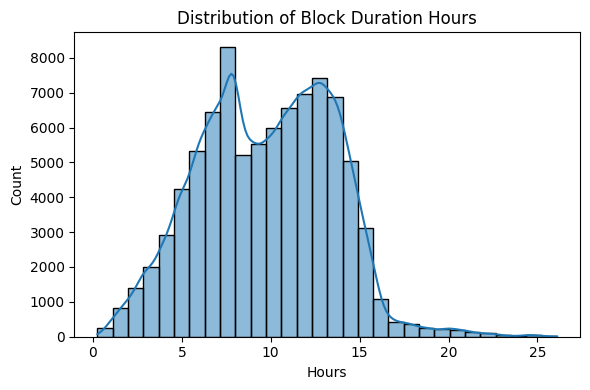

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df["SH_r_hours"], bins=30, kde=True)
plt.title("Distribution of Block Duration Hours")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

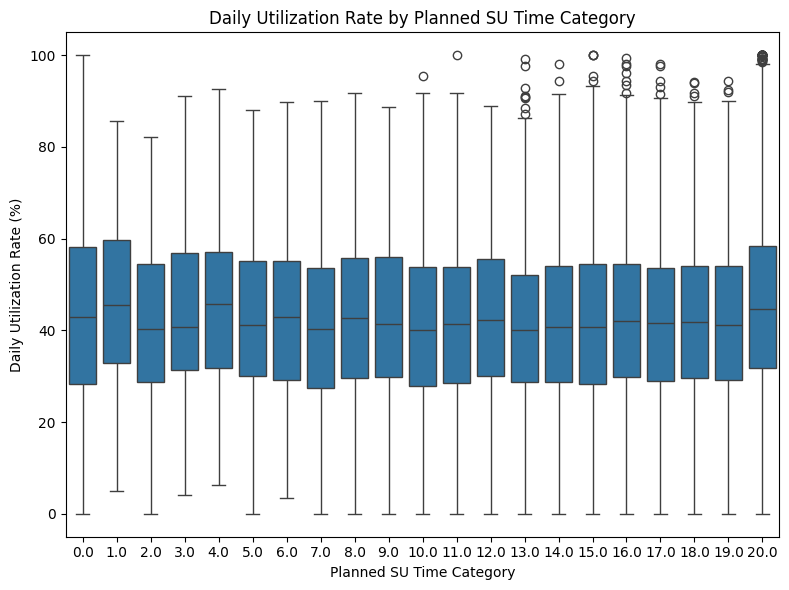

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Planned SU Time (Large/Medium/Small)', y='daily_utilization_rate', data=df)
plt.title("Daily Utilization Rate by Planned SU Time Category")
plt.xlabel("Planned SU Time Category")
plt.ylabel("Daily Utilization Rate (%)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-63-3030523410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_surgeons.index, y=top_5_surgeons.values, palette='viridis')


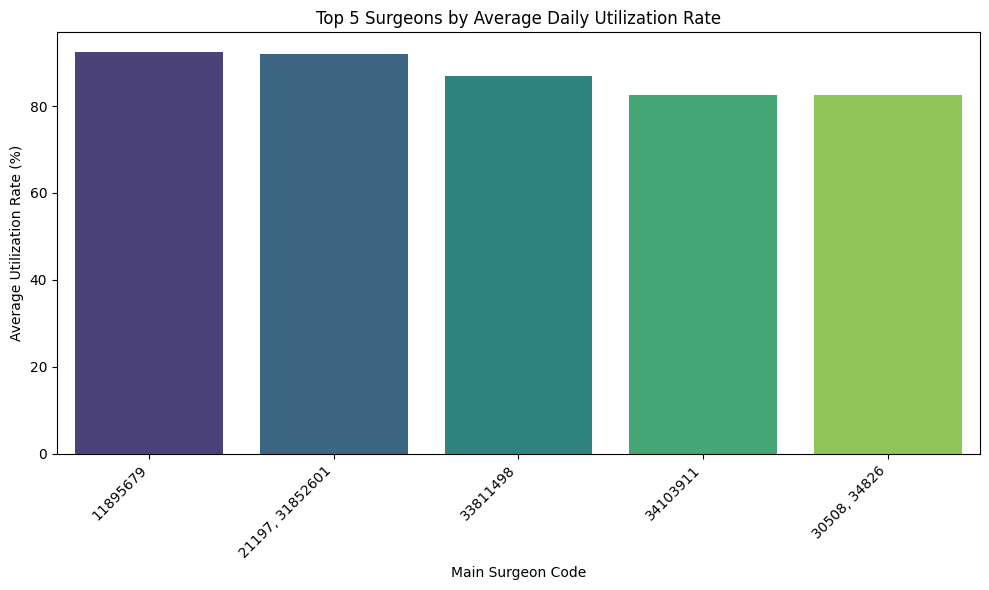

/tmp/ipython-input-63-3030523410.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_surgeons.index, y=bottom_5_surgeons.values, palette='viridis')


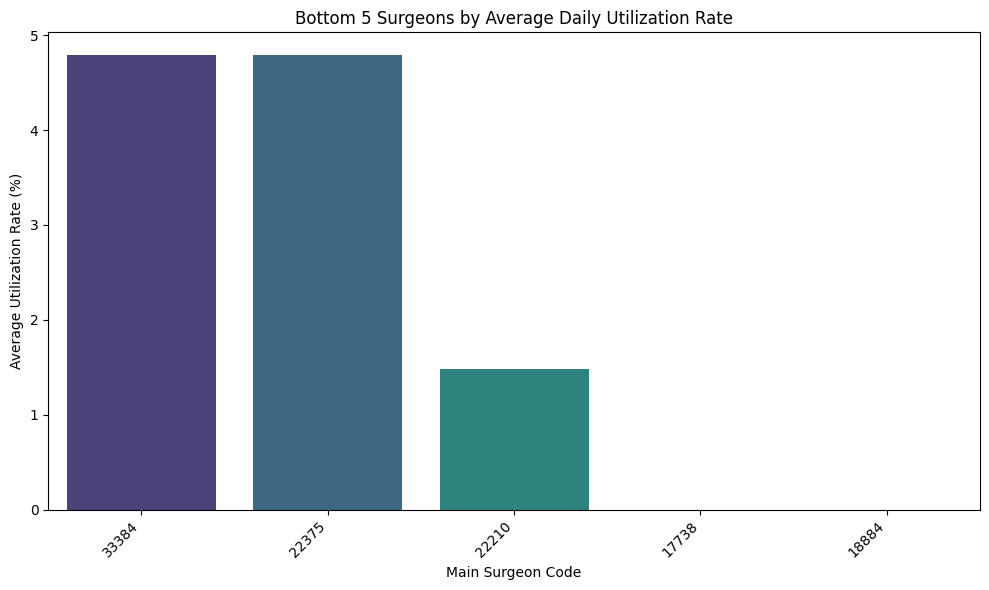

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 surgeons by utilization
top_5_surgeons = surgeon_utilization.head(5)

# Create a bar plot for the top 5
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_surgeons.index, y=top_5_surgeons.values, palette='viridis')
plt.title("Top 5 Surgeons by Average Daily Utilization Rate")
plt.xlabel("Main Surgeon Code")
plt.ylabel("Average Utilization Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Get the bottom 5 surgeons by utilization (excluding NaN values)
bottom_5_surgeons = surgeon_utilization.dropna().tail(5)

# Create a bar plot for the bottom 5
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_surgeons.index, y=bottom_5_surgeons.values, palette='viridis')
plt.title("Bottom 5 Surgeons by Average Daily Utilization Rate")
plt.xlabel("Main Surgeon Code")
plt.ylabel("Average Utilization Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-3861976987.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_utilization.index, y=room_utilization.values, palette='viridis')


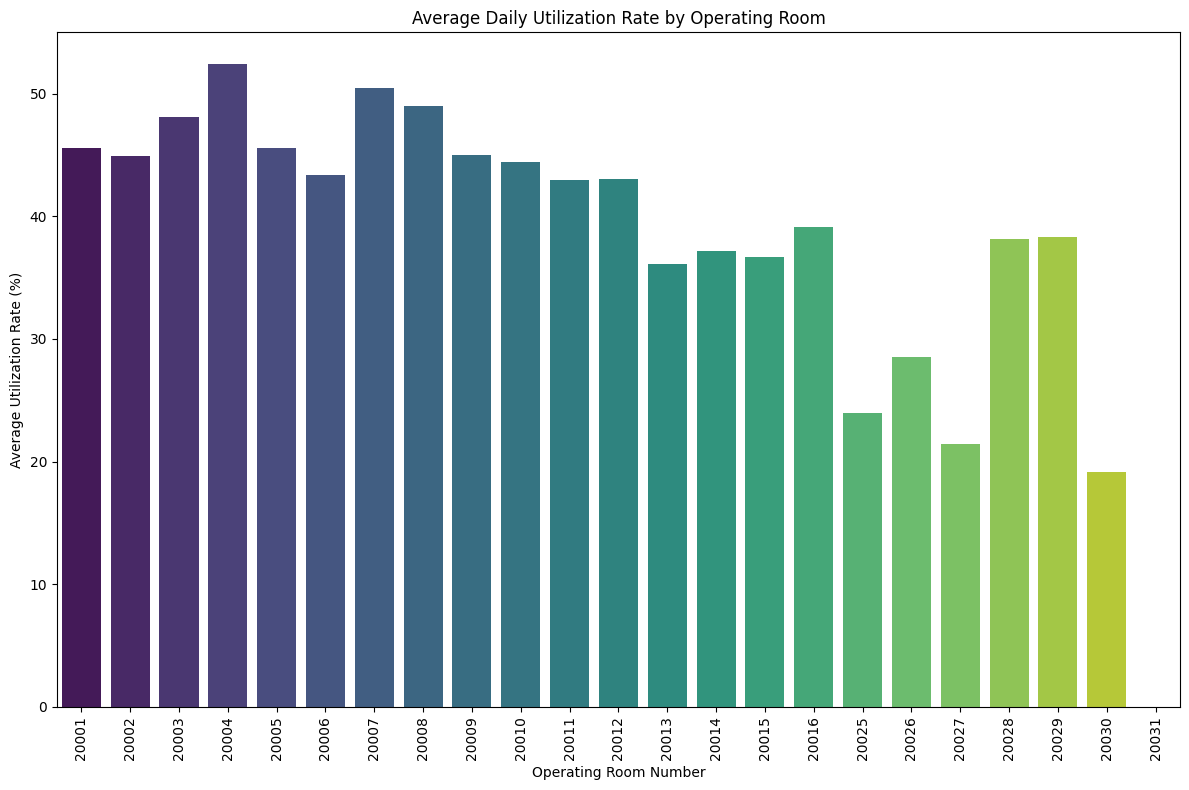

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average daily utilization rate per operating room
room_utilization = df.groupby('Actual Operating Room Number')['daily_utilization_rate'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=room_utilization.index, y=room_utilization.values, palette='viridis')
plt.title("Average Daily Utilization Rate by Operating Room")
plt.xlabel("Operating Room Number")
plt.ylabel("Average Utilization Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [68]:
import pandas as pd

# 'Main Surgeon Code', 'daily_utilization_rate', and other team members.
# Identify columns representing other team members (excluding 'Main Surgeon Code')
team_member_cols = [col for col in df.columns if 'Team Member' in col or 'Anesthesiologist Code' in col]

# Add 'Main Surgeon Code' to the grouping columns
grouping_cols = ['Main Surgeon Code'] + team_member_cols

# Group by the combination of main surgeon and other team members and calculate the mean utilization
team_utilization = df.groupby(grouping_cols)['daily_utilization_rate'].mean().sort_values(ascending=False)

# Display the top 10 combinations with the highest utilization
if not team_utilization.empty:
    top_10_utilization_combos = team_utilization.head(10)
    print("Top 10 Combinations of Surgeon and Team Members with the Highest Average Utilization Rate:")
    display(top_10_utilization_combos)
else:
    print("Could not calculate team utilization. Please check the column names for team members.")

Top 10 Combinations of Surgeon and Team Members with the Highest Average Utilization Rate:


,,daily_utilization_rate
Main Surgeon Code,Anesthesiologist Code,
319234514,2438,100.000741
10248,2206,100.000222
29734,2546,100.000220
14538,2167,100.000190
30382,2167,100.000000
33061946,2061,100.000000
15666175,4166,100.000000
33790,4222,100.000000
30079,3590,99.999636


All EDA graph analyses are in a Word file in the folder. In addition, some additional graphs from the EDA are also in the various model developments and their explanations. See the project book.